In [1]:
import gpfanova, scipy
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
ds = gpfanova.dataset.DataSet('data/hsalinarum/gradientTest-1/')

ds.data = ds.data.iloc[:,ds.meta.sort_values(by=['mM PQ','M NaCl']).index]
ds.meta = ds.meta.sort_values(by=['mM PQ','M NaCl'])

ds.data.columns = range(ds.data.shape[1])
ds.meta.index = range(ds.data.shape[1])

In [4]:
ds.meta.head()

,Well,Strain,Media,mM PQ,M NaCl,Bio,Tech
0,273,ura3,CM,0.0,2.34,A,1.0
1,274,ura3,CM,0.0,2.34,A,2.0
2,275,ura3,CM,0.0,2.34,A,3.0
3,276,ura3,CM,0.0,2.34,B,1.0
4,277,ura3,CM,0.0,2.34,B,2.0


In [5]:
x,y,effect,labels = ds.build(effects=['mM PQ','M NaCl','Bio','Tech'],Strain='ura3',scale='range')
y = np.log2(y)
y = y-y.min()
# y = y-y[0,:]
# y = (y-y.mean())/y.std()

In [6]:
labels

[[0.0,
  0.041500000000000002,
  0.083000000000000004,
  0.16699999999999998,
  0.23600000000000002,
  0.33299999999999996,
  0.47100000000000003,
  0.66700000000000004,
  1.3330000000000002],
 [2.3399999999999999,
  2.6200000000000001,
  2.8999999999999999,
  3.1800000000000002,
  3.46,
  3.7400000000000002,
  4.2000000000000002],
 ['A', 'B', 'C', 'D'],
 [1.0, 2.0, 3.0]]

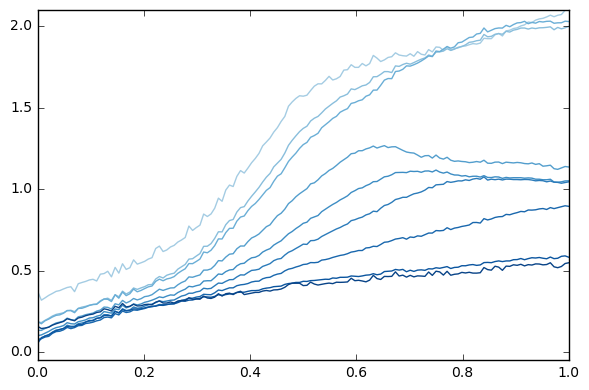

In [7]:
plt.figure(figsize=(6,4))

cmap = plt.get_cmap('Blues')
buff = 5
colors = [cmap(1.*(i+buff)/(len(labels[0])+buff)) for i in range(len(labels[0]))]

for i in np.unique(effect.values[:,0]):
    select = (effect.values[:,0] == i) & (effect.values[:,1] == 6)
    plt.plot(x,y[:,select].mean(1),c=colors[i]);
        
plt.ylim(-.05,2.1)
        
plt.tight_layout()

# plt.savefig("figures/lund/ecoli.png",dpi=300,bbox_inches='tight')

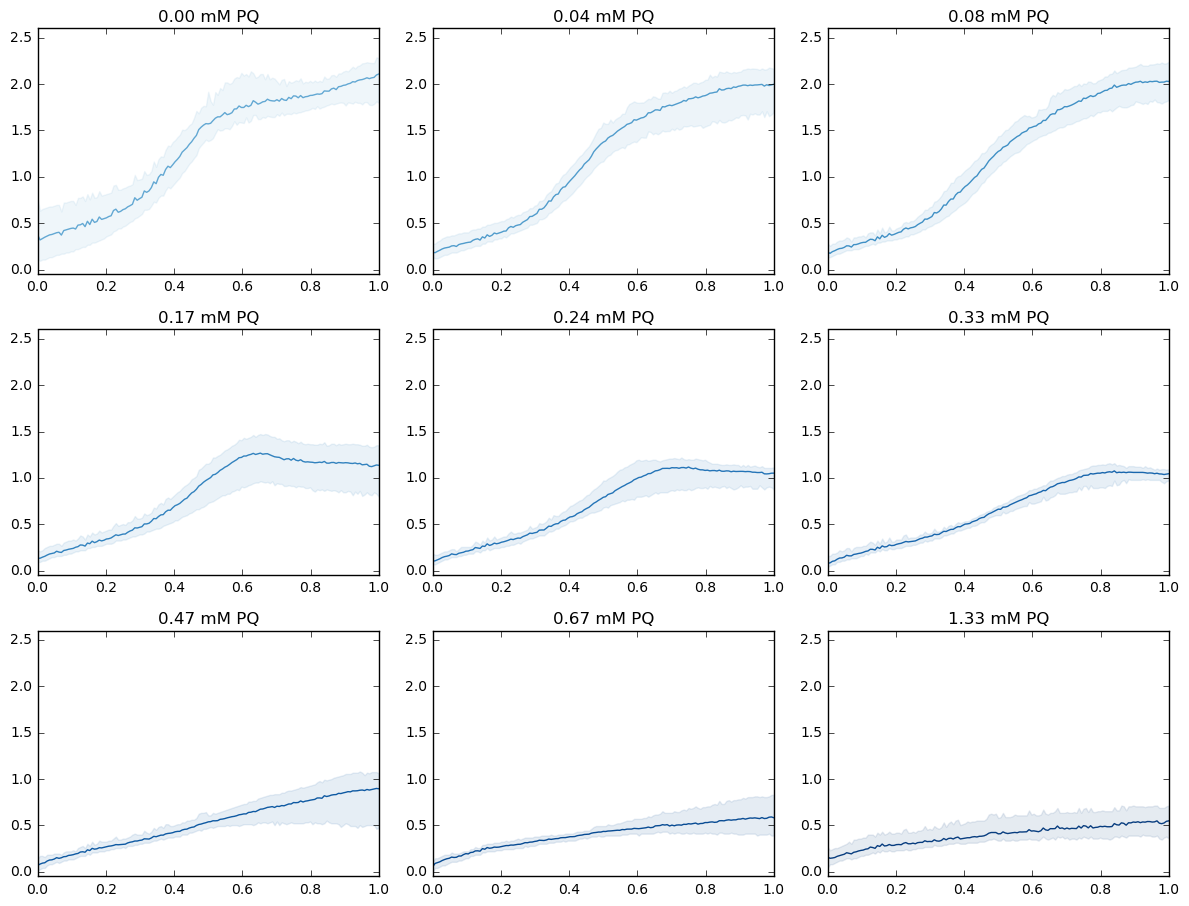

In [8]:
plt.figure(figsize=(12,12))

cmap = plt.get_cmap('Blues')
buff = 10
colors = [cmap(1.*(i+buff)/(len(labels[0])+buff)) for i in range(len(labels[0]))]

for i in np.unique(effect.values[:,0]):
    plt.subplot(4,len(labels[0])/4+1,1+i)
    plt.title("%.2lf mM PQ"%labels[0][i])
    
    select = (effect.values[:,0] == i) & (effect.values[:,1] == 6)
    plt.plot(x,y[:,select].mean(1),c=colors[i]);
    ys = y[:,select]
    # plt.fill_between(x[:,0],ys.mean(1)-2*ys.std(1),ys.mean(1)+2*ys.std(1),alpha=.2,color=colors[i]);
    plt.fill_between(x[:,0],ys.min(1),ys.max(1),alpha=.1,color=colors[i]);
        
    plt.ylim(-.05,2.6)
        
plt.tight_layout()

plt.savefig("figures/hsalinarum/pq.png",dpi=300,bbox_inches='tight')

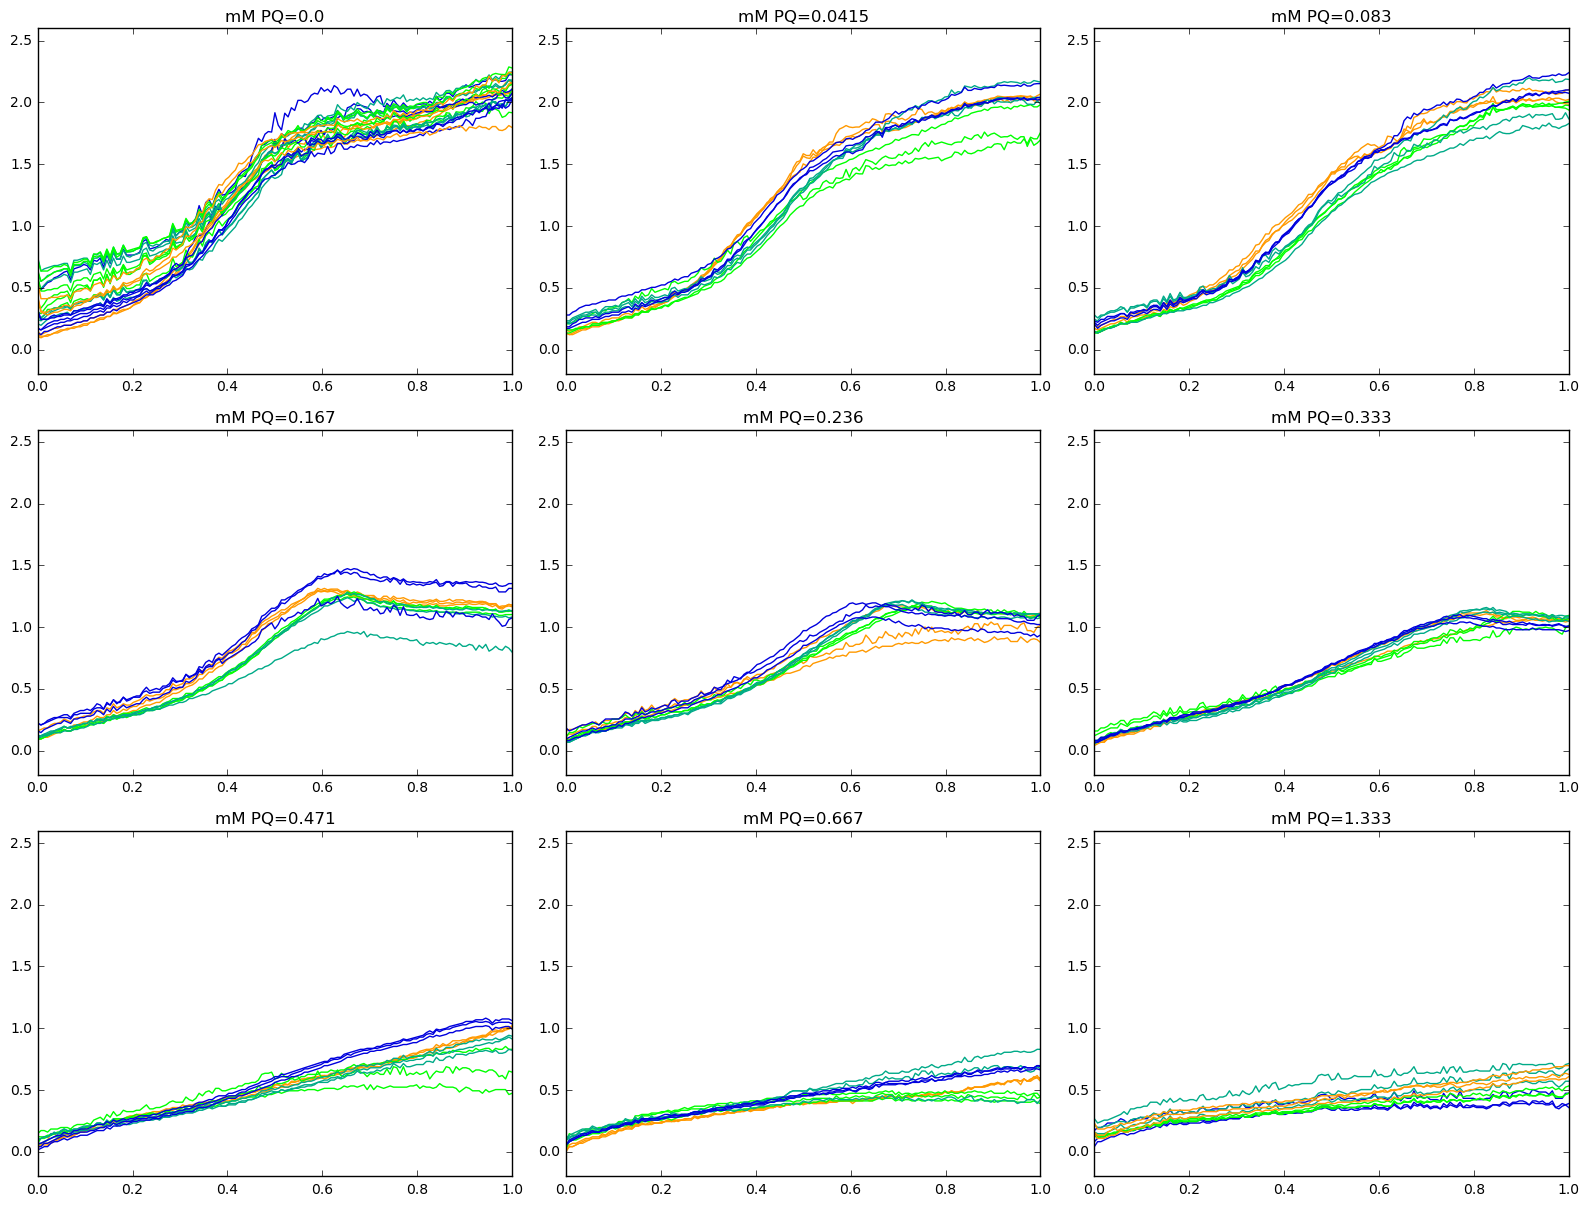

In [10]:
plt.figure(figsize=(16,16))

cmap = plt.get_cmap('spectral')
buff = 1
colors = [cmap(1.*(i+buff)/(len(labels[2])+buff)) for i in range(len(labels[2]))]

for i in np.unique(effect.values[:,0]):
    plt.subplot(4,len(labels[0])/4+1,i+1)
    plt.title("mM PQ=%s"%labels[0][i])
    select = (effect.values[:,0] == i) & (effect.values[:,1] == 6)
    #plt.plot(x,y[:,select]);
    
    for k in np.where(select)[0]:
        plt.plot(x,y[:,k],c=colors[effect.values[k,2]]);        
        
    plt.ylim(-.2,2.6)
        
plt.tight_layout()

plt.savefig("figures/hsalinarum/pq-batcheffects.png",dpi=300,bbox_inches='tight')

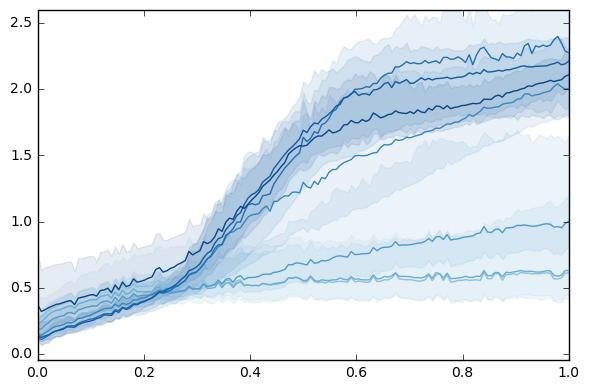

In [90]:
plt.figure(figsize=(6,4))

cmap = plt.get_cmap('Blues')
buff = 5
colors = [cmap(1.*(i+buff)/(len(labels[1])+buff)) for i in range(len(labels[1]))]

for i in np.unique(effect.values[:,1]):
    select = (effect.values[:,0] == 0) & (effect.values[:,1] == i)
    plt.plot(x,y[:,select].mean(1),c=colors[i]);
    ys = y[:,select]
    # plt.fill_between(x[:,0],ys.mean(1)-2*ys.std(1),ys.mean(1)+2*ys.std(1),alpha=.2,color=colors[i]);
    plt.fill_between(x[:,0],ys.min(1),ys.max(1),alpha=.1,color=colors[i]);
        
plt.ylim(-.05,2.6)
        
plt.tight_layout()

# plt.savefig("figures/lund/ecoli.png",dpi=300,bbox_inches='tight')

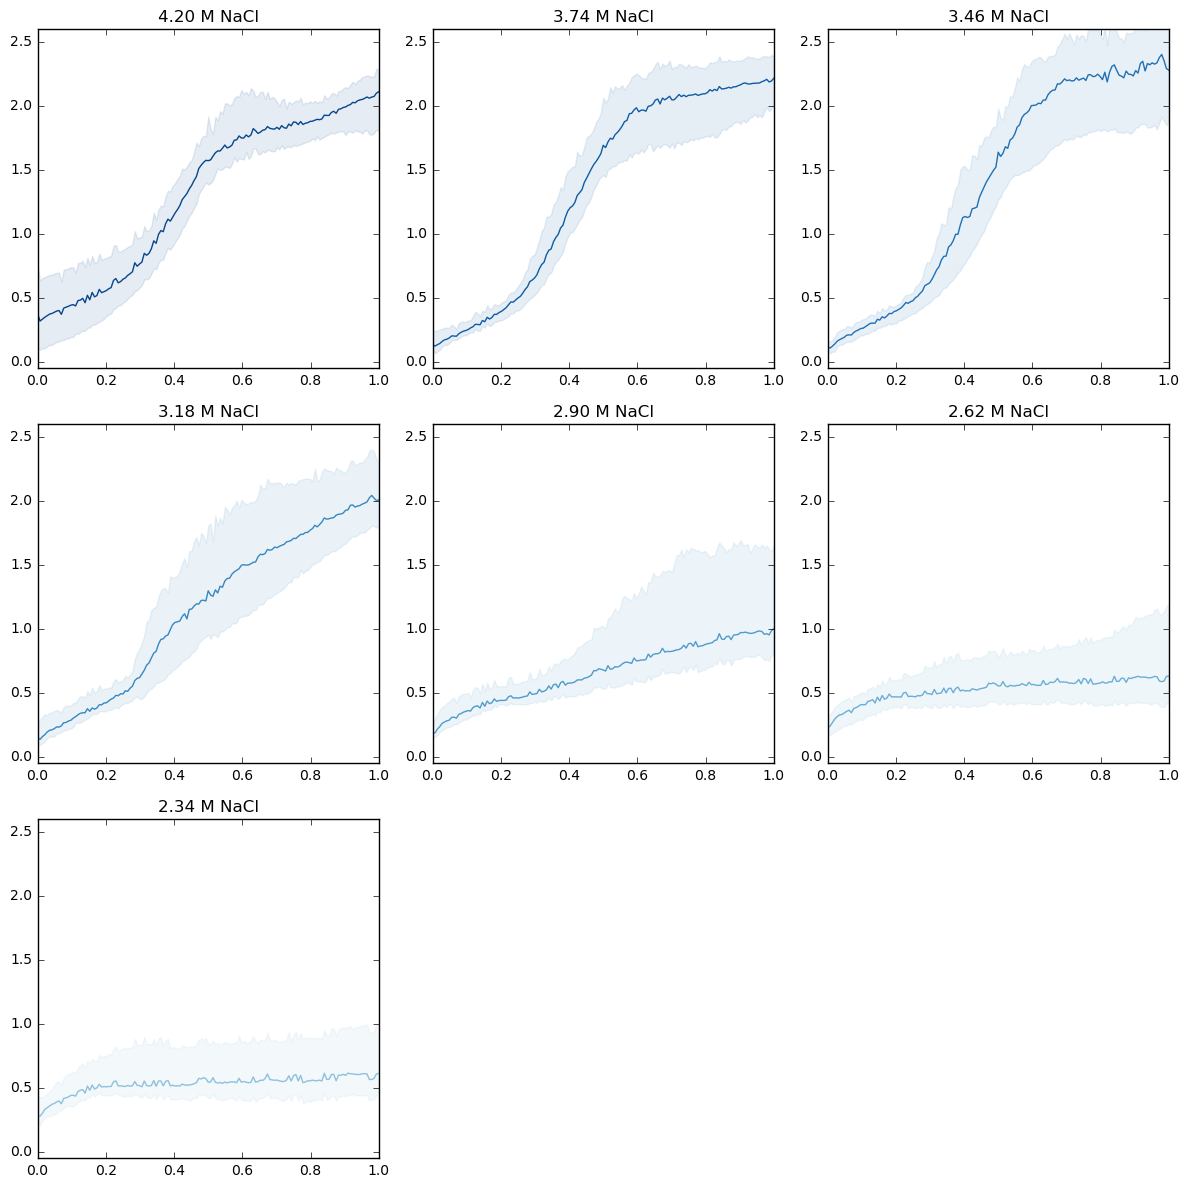

In [275]:
plt.figure(figsize=(12,12))

cmap = plt.get_cmap('Blues')
buff = 5
colors = [cmap(1.*(i+buff)/(len(labels[1])+buff)) for i in range(len(labels[1]))]

for i in np.unique(effect.values[:,1]):
    plt.subplot(3,len(labels[1])/3+1,len(labels[1])-i)
    plt.title("%.2lf M NaCl"%labels[1][i])
    
    select = (effect.values[:,0] == 0) & (effect.values[:,1] == i)
    plt.plot(x,y[:,select].mean(1),c=colors[i]);
    ys = y[:,select]
    # plt.fill_between(x[:,0],ys.mean(1)-2*ys.std(1),ys.mean(1)+2*ys.std(1),alpha=.2,color=colors[i]);
    plt.fill_between(x[:,0],ys.min(1),ys.max(1),alpha=.1,color=colors[i]);
        
    plt.ylim(-.05,2.6)
        
plt.tight_layout()

plt.savefig("figures/hsalinarum/nacl.png",dpi=300,bbox_inches='tight')

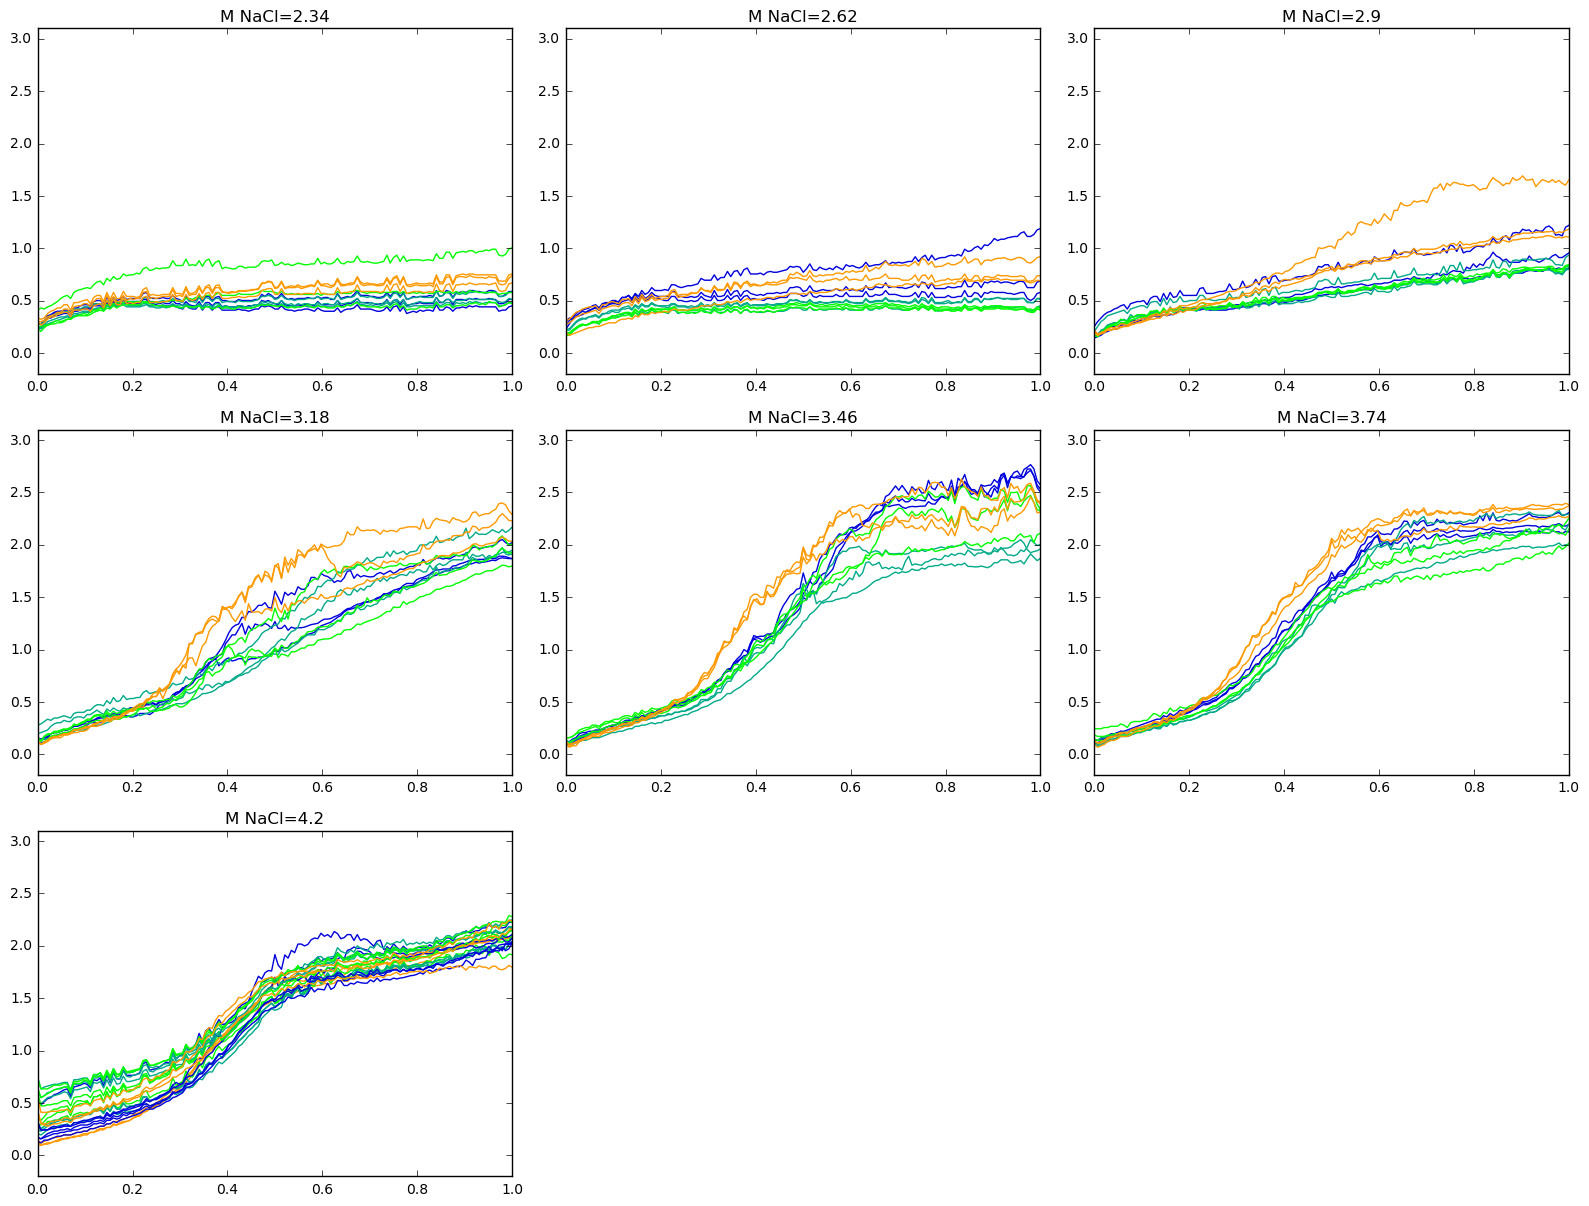

In [109]:
plt.figure(figsize=(16,16))

cmap = plt.get_cmap('spectral')
buff = 1
colors = [cmap(1.*(i+buff)/(len(labels[2])+buff)) for i in range(len(labels[2]))]

for i in np.unique(effect.values[:,1]):
    plt.subplot(4,len(labels[0])/4+1,i+1)
    plt.title("M NaCl=%s"%labels[1][i])
    select = (effect.values[:,1] == i) & (effect.values[:,0] == 0)
    #plt.plot(x,y[:,select]);
    
    for k in np.where(select)[0]:
        plt.plot(x,y[:,k],c=colors[effect.values[k,2]]);        
        
    plt.ylim(-.2,3.1)
        
plt.tight_layout()

# plt.savefig("figures/lund/ecoli.png",dpi=300,bbox_inches='tight')

In [67]:
select = (effect.values[:,0] == 0) & (effect.values[:,1] == 6)
ds.meta.loc[select,:]

,Well,Strain,Media,mM PQ,M NaCl,Bio,Tech
72,188,ura3,CM,0.0,4.2,D,3.0
73,189,ura3,CM,0.0,4.2,D,2.0
74,190,ura3,CM,0.0,4.2,D,1.0
75,191,ura3,CM,0.0,4.2,C,3.0
76,192,ura3,CM,0.0,4.2,C,2.0
77,193,ura3,CM,0.0,4.2,C,1.0
78,194,ura3,CM,0.0,4.2,B,3.0
79,195,ura3,CM,0.0,4.2,B,2.0
80,196,ura3,CM,0.0,4.2,B,1.0
81,197,ura3,CM,0.0,4.2,A,3.0


In [127]:
ds2 = gpfanova.dataset.DataSet('data/ura3-pq-replicate/')
ds2.data = ds2.data.iloc[:,ds2.meta.sort_values(by=['mM_PQ']).index]
ds2.meta = ds2.meta.sort_values(by=['mM_PQ'])

ds2.data.columns = range(ds.data.shape[1])
ds2.meta.index = range(ds.data.shape[1])

x2,y2,effect2,labels2 = ds2.build(Strain='ura3',effects=['mM_PQ'],scale='range')
y2 = np.log2(y2)
y2 = y2-y2.min()
# y = (y-y.mean())/y.std()

In [135]:
effectMap = {}
combined = list(set(labels[0]+labels2[0]))
for c in combined:
    if c in labels[0]:
        m = labels[0].index(c)
    else:
        m = None
    if c in labels2[0]:
        m = m,labels2[0].index(c)
    else:
        m = m,None
    effectMap[c] = m
    
effectMap

{0.0: (0, 0),
 0.041500000000000002: (1, 1),
 0.083000000000000004: (2, 2),
 0.16699999999999998: (3, 3),
 0.23600000000000002: (4, None),
 0.33299999999999996: (5, 4),
 0.47100000000000003: (6, None),
 0.66700000000000004: (7, 5),
 1.3330000000000002: (8, 6)}

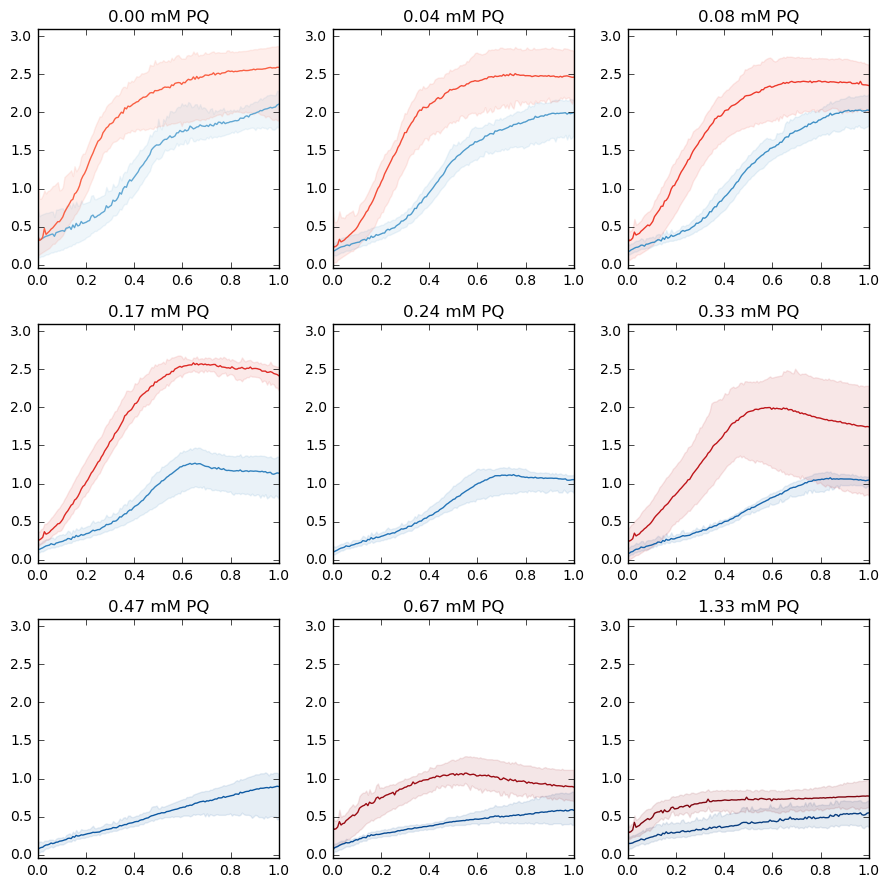

In [146]:
plt.figure(figsize=(9,9))


combined = list(set(labels[0]+labels2[0]))
combined.sort()

buff = 10
cmap = plt.get_cmap('Blues')
colors = [cmap(1.*(i+buff)/(len(combined)+buff)) for i in range(len(combined))]
cmap = plt.get_cmap('Reds')
colors2 = [cmap(1.*(i+buff)/(len(combined)+buff)) for i in range(len(combined))]

for i,c in enumerate(combined):
    
    m1,m2 = effectMap[c]
    
    plt.subplot(3,3,1+i)
    plt.title("%.2lf mM PQ"%combined[i])
    
    select = (effect.values[:,0] == m1) & (effect.values[:,1] == 6)
    
    if sum(select)>0:
        plt.plot(x,y[:,select].mean(1),c=colors[i]);
        ys = y[:,select]
    # plt.fill_between(x[:,0],ys.mean(1)-2*ys.std(1),ys.mean(1)+2*ys.std(1),alpha=.2,color=colors[i]);
        plt.fill_between(x[:,0],ys.min(1),ys.max(1),alpha=.1,color=colors[i]);
        
    #plt.ylim(-.05,3.1)
    
    #plt.subplot(2,len(combined),1+i+len(combined))

    if not m2 is None:
    
        select = (effect2.values[:,0] == m2)# & (effect.values[:,1] == 6)

        if sum(select)>0:
            plt.plot(x2,y2[:,select].mean(1),c=colors2[i]);
            ys = y2[:,select]
        # plt.fill_between(x[:,0],ys.mean(1)-2*ys.std(1),ys.mean(1)+2*ys.std(1),alpha=.2,color=colors[i]);
            plt.fill_between(x2[:,0],ys.min(1),ys.max(1),alpha=.1,color=colors2[i]);

    plt.ylim(-.05,3.1)
        
plt.tight_layout()

plt.savefig("figures/hsalinarum/pq-compare.png",dpi=300,bbox_inches='tight')

# Salt 

In [249]:
ds3 = gpfanova.dataset.DataSet('data/hsalinarum/beer-et-al-2014/')

ds3.meta['KCl.ratio'] = (ds3.meta['KCl.Concentration'] / (ds3.meta['KCl.Concentration'] + ds3.meta['MgSO4.Concentration'])).round(2)

sortby = ['NaCl.Concentration','KCl.ratio',u'MgSO4.Concentration',u'KCl.Concentration',u'Total.Concentration']
ds3.data = ds3.data.iloc[:,ds3.meta.sort_values(by=sortby).index]
ds3.meta = ds3.meta.sort_values(by=sortby)

ds3.data = ds3.data.loc[ds3.data.index<50,:]

ds3.data = ds3.data.loc[:,~ds3.meta.Background.isnull()]
ds3.meta = ds3.meta.loc[~ds3.meta.Background.isnull(),:]

# ds2.data.columns = range(ds.data.shape[1])
# ds2.meta.index = range(ds.data.shape[1])

x3,y3,effect3,labels3 = ds3.build(Strain='ura3',effects=sortby,scale='range')

x3 = x3[4:,:]
y3 = y3[4:,:]

x3 = x3[~np.isnan(y3).any(1),:]
y3 = y3[~np.isnan(y3).any(1),:]

# y2 = np.log2(y2)
# y3 = y3-y3.min()
# y = (y-y.mean())/y.std()

y3 = y3-y3[0,:]

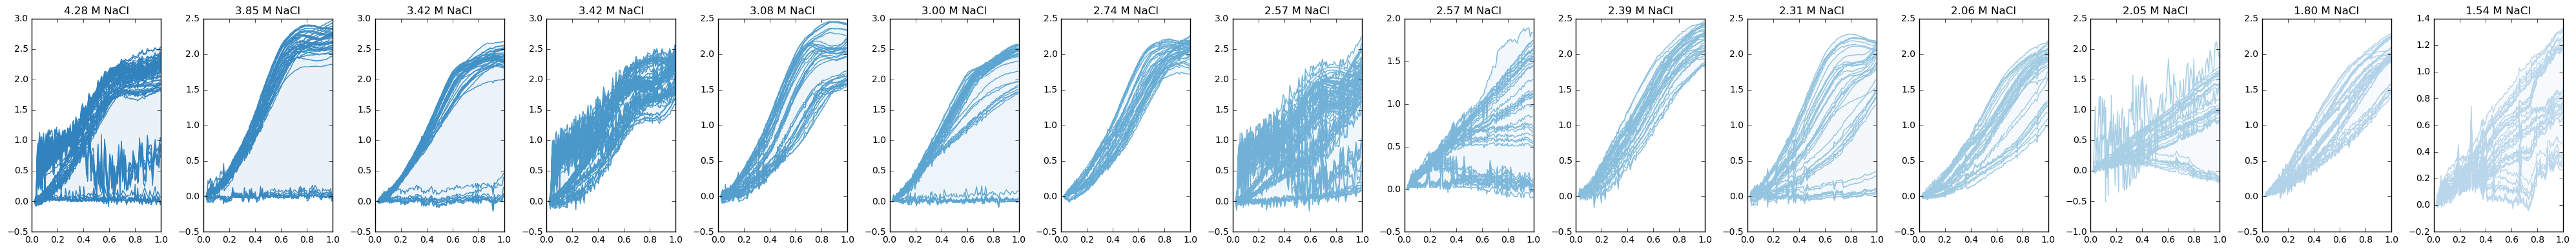

In [227]:
plt.figure(figsize=(40,4))

cmap = plt.get_cmap('Blues')
buff = 10
colors = [cmap(1.*(i+buff)/(len(labels3[0])+2*buff)) for i in range(len(labels3[0]))]

for i in np.unique(effect3.values[:,0]):
    plt.subplot(1,len(labels3[0]),len(labels3[0])-i)
    plt.title("%.2lf M NaCl"%labels3[0][i])
    
    #select = (effect3.values[:,0] == 0) & (effect.values[:,1] == i)
    select = (effect3.values[:,0] == i)
    plt.plot(x3,y3[:,select].mean(1),c=colors[i]);
    ys = y3[:,select]
    # plt.fill_between(x[:,0],ys.mean(1)-2*ys.std(1),ys.mean(1)+2*ys.std(1),alpha=.2,color=colors[i]);
    plt.fill_between(x3[:,0],ys.min(1),ys.max(1),alpha=.1,color=colors[i]);
    
    plt.plot(x3,y3[:,select],c=colors[i]);
        
    #plt.ylim(-.05,5)
        
plt.tight_layout()

# plt.savefig("figures/lund/ecoli.png",dpi=300,bbox_inches='tight')

In [244]:
ds3.meta.columns

Index([u'Arg.Concentration', u'Asp.Concentration', u'Background',
       u'Biological.Replicate', u'Date', u'File.Name',
       u'Glycerol.Concentration', u'Initials', u'Ion.Composition.Name',
       u'KCl.Concentration', u'KCl.g.per.L', u'Knockout', u'Media',
       u'MgSO4.7H2O.g.per.L', u'MgSO4.Concentration', u'MgSO4.g.per.L',
       u'NaCl.Concentration', u'NaCl.g.per.L', u'Omit', u'Overexpression',
       u'Pyruvate.Concentration', u'Technical.Replicate', u'Temp',
       u'Total.Concentration', u'Total.g.per.L', u'Well', u'Well.Name',
       u'Well.Number', u'pH', u'plate'],
      dtype='object')

571    1.00
572    1.00
573    1.00
574    1.00
575    1.00
576    1.00
577    1.00
578    1.00
561    0.75
562    0.75
563    0.75
564    0.75
565    0.75
566    0.75
567    0.75
568    0.75
551    0.50
552    0.50
553    0.50
554    0.50
555    0.50
556    0.50
557    0.50
558    0.50
541    0.25
542    0.25
543    0.25
544    0.25
545    0.25
546    0.25
       ... 
823    0.25
824    0.25
825    0.25
826    0.25
827    0.25
828    0.25
981    0.25
982    0.25
983    0.25
984    0.25
985    0.25
986    0.25
987    0.25
988    0.25
211    0.00
212    0.00
213    0.00
214    0.00
215    0.00
216    0.00
217    0.00
218    0.00
811    0.00
812    0.00
813    0.00
814    0.00
815    0.00
816    0.00
817    0.00
818    0.00
dtype: float64

In [174]:
ds3.meta.iloc[0,:]

Arg.Concentration                             NaN
Asp.Concentration                             NaN
Background                                  Dura3
Biological.Replicate                            1
Date                                    201201311
File.Name                  ResultsKB201201311.csv
Glycerol.Concentration                        NaN
Initials                                       KB
Ion.Composition.Name                 CM.Mratio.15
KCl.Concentration                          1.0908
KCl.g.per.L                                  81.3
Knockout                                      NaN
Media                                          CM
MgSO4.7H2O.g.per.L                            NaN
MgSO4.Concentration                             0
MgSO4.g.per.L                                   0
NaCl.Concentration                          1.542
NaCl.g.per.L                                   90
Omit                                          NaN
Overexpression                                NaN


In [175]:
ds3.meta[[u'MgSO4.Concentration','NaCl.Concentration','Total.Concentration']]

,MgSO4.Concentration,NaCl.Concentration,Total.Concentration
571,0.0000,1.542,2.6328
572,0.0000,1.542,2.6328
573,0.0000,1.542,2.6328
574,0.0000,1.542,2.6328
575,0.0000,1.542,2.6328
576,0.0000,1.542,2.6328
577,0.0000,1.542,2.6328
578,0.0000,1.542,2.6328
561,0.2724,1.542,2.6328
562,0.2724,1.542,2.6328


In [228]:
ds3.meta['NaCl.Concentration'].unique()

array([ 1.542,  1.8  ,  2.052,  2.056,  2.313,  2.39 ,  2.568,  2.57 ,
        2.736,  3.   ,  3.078,  3.42 ,  3.424,  3.852,  4.28 ])

In [232]:
ds.meta['M NaCl'].unique()

array([ 2.34,  2.62,  2.9 ,  3.18,  3.46,  3.74,  4.2 ])

In [236]:
allConcs = list(set(ds3.meta['NaCl.Concentration'].unique().tolist()+ds.meta['M NaCl'].unique().tolist()))
allConcs.sort()
allConcs

[1.5419999999999998,
 1.8,
 2.052,
 2.056,
 2.313,
 2.34,
 2.39,
 2.568,
 2.57,
 2.62,
 2.736,
 2.9,
 3.0,
 3.0780000000000003,
 3.18,
 3.42,
 3.424,
 3.46,
 3.74,
 3.852,
 4.2,
 4.28]

In [238]:
effectMap = {}
combined = list(set(labels[1]+labels3[0]))
for c in combined:
    if c in labels[1]:
        m = labels[1].index(c)
    else:
        m = None
    if c in labels3[0]:
        m = m,labels3[0].index(c)
    else:
        m = m,None
    effectMap[c] = m
    
effectMap

{1.5419999999999998: (None, 0),
 1.8: (None, 1),
 2.052: (None, 2),
 2.056: (None, 3),
 2.3130000000000002: (None, 4),
 2.3399999999999999: (0, None),
 2.3900000000000001: (None, 5),
 2.5680000000000001: (None, 6),
 2.5699999999999998: (None, 7),
 2.6200000000000001: (1, None),
 2.7360000000000002: (None, 8),
 2.8999999999999999: (2, None),
 3.0: (None, 9),
 3.0780000000000003: (None, 10),
 3.1800000000000002: (3, None),
 3.4199999999999999: (None, 11),
 3.4239999999999999: (None, 12),
 3.46: (4, None),
 3.7400000000000002: (5, None),
 3.8519999999999999: (None, 13),
 4.2000000000000002: (6, None),
 4.2800000000000002: (None, 14)}

In [250]:
labels3

[[1.5419999999999998,
  1.8,
  2.052,
  2.056,
  2.3130000000000002,
  2.3900000000000001,
  2.5680000000000001,
  2.5699999999999998,
  2.7360000000000002,
  3.0,
  3.0780000000000003,
  3.4199999999999999,
  3.4239999999999999,
  3.8519999999999999,
  4.2800000000000002],
 [0.0, 0.25, 0.5, 0.75, 1.0],
 [1.0908,
  0.81840000000000002,
  0.5454,
  0.27239999999999998,
  0.0,
  1.2729999999999999,
  0.95499999999999996,
  0.63600000000000001,
  0.318,
  0.58079999999999998,
  0.43559999999999999,
  0.29039999999999999,
  0.1452,
  1.4543999999999999,
  1.0911999999999999,
  0.72719999999999996,
  0.36320000000000002,
  1.6362000000000001,
  1.2276,
  0.81810000000000005,
  0.40860000000000002,
  0.67799999999999994,
  0.50800000000000001,
  0.33899999999999997,
  0.16899999999999998,
  0.064799999999999996,
  0.048599999999999997,
  0.032399999999999998,
  0.016199999999999999,
  1.8180000000000001,
  1.3640000000000001,
  0.90900000000000003,
  0.45399999999999996,
  0.7743999999999999

/home/ptonner/dev/combinatorial-growth/lib/python2.7/site-packages/ipykernel/__main__.py:23: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


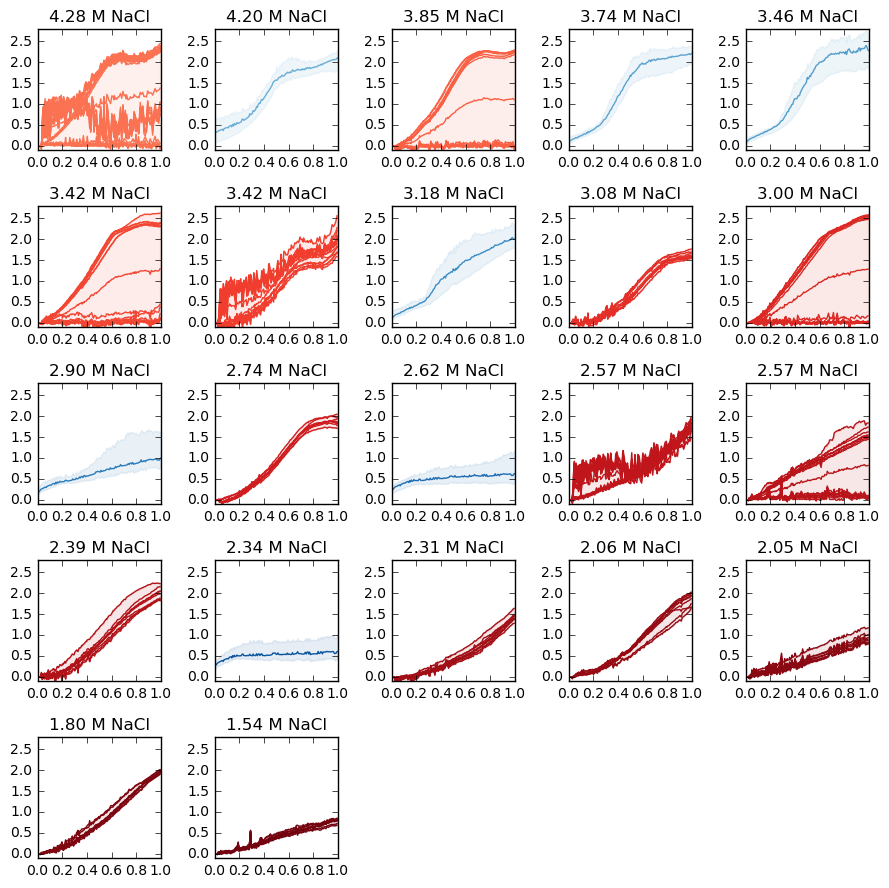

In [267]:
plt.figure(figsize=(9,9))

combined = list(set(labels[1]+labels3[0]))
combined.sort()
combined.reverse()

buff = 20
cmap = plt.get_cmap('Blues')
colors = [cmap(1.*(i+buff)/(len(combined)+buff)) for i in range(len(combined))]
cmap = plt.get_cmap('Reds')
colors2 = [cmap(1.*(i+buff)/(len(combined)+buff)) for i in range(len(combined))]


ncol = 5

for i,c in enumerate(combined):
    
    m1,m2 = effectMap[c]
    
    plt.subplot(len(effectMap.keys())/ncol+1,ncol,1+i)
    plt.title("%.2lf M NaCl"%combined[i])
    
    select = (effect.values[:,1] == m1) & (effect.values[:,0] == 0)
    
    if not m1 is None:
    
        if sum(select)>0:
            plt.plot(x,y[:,select].mean(1),c=colors[i]);
            ys = y[:,select]
            plt.fill_between(x[:,0],ys.min(1),ys.max(1),alpha=.1,color=colors[i]);
        
    #plt.ylim(-.05,3.1)
    
    #plt.subplot(2,len(combined),1+i+len(combined))

    if not m2 is None:
    
        select = (effect3.values[:,0] == m2) & (effect3.values[:,1] == 1)

        if sum(select)>0:
            plt.plot(x3,y3[:,select].mean(1),c=colors2[i]);
            ys = y3[:,select]
        # plt.fill_between(x[:,0],ys.mean(1)-2*ys.std(1),ys.mean(1)+2*ys.std(1),alpha=.2,color=colors[i]);
            plt.fill_between(x3[:,0],ys.min(1),ys.max(1),alpha=.1,color=colors2[i]);
            
            plt.plot(x3,y3[:,select],c=colors2[i]);

    plt.ylim(-.1,2.8)
        
plt.tight_layout()

plt.savefig("figures/hsalinarum/nacl-compare.png",dpi=300,bbox_inches='tight')

In [258]:
len(combined)

22

In [260]:
labels3[0]

[1.5419999999999998,
 1.8,
 2.052,
 2.056,
 2.3130000000000002,
 2.3900000000000001,
 2.5680000000000001,
 2.5699999999999998,
 2.7360000000000002,
 3.0,
 3.0780000000000003,
 3.4199999999999999,
 3.4239999999999999,
 3.8519999999999999,
 4.2800000000000002]

In [261]:
effectMap[4.2800000000000002]

(None, 14)

In [264]:
select = (effect3.values[:,0] == 14) & (effect3.values[:,1] == 1)
effect3.values[select,:]

array([[14,  1, 54, 53,  4],
       [14,  1, 54, 53,  4],
       [14,  1, 54, 53,  4],
       [14,  1, 54, 53,  4],
       [14,  1, 54, 53,  4],
       [14,  1, 54, 53,  4],
       [14,  1, 54, 53,  4],
       [14,  1, 54, 53,  4],
       [14,  1, 54, 53,  4],
       [14,  1, 54, 53,  4],
       [14,  1, 54, 53,  4],
       [14,  1, 54, 53,  4],
       [14,  1, 54, 53,  4],
       [14,  1, 54, 53,  4],
       [14,  1, 54, 53,  4],
       [14,  1, 54, 53,  4],
       [14,  1, 54, 53,  4],
       [14,  1, 54, 53,  4],
       [14,  1, 54, 53,  4],
       [14,  1, 54, 53,  4],
       [14,  1, 54, 53,  4],
       [14,  1, 54, 53,  4],
       [14,  1, 54, 53,  4],
       [14,  1, 54, 53,  4],
       [14,  1, 54, 53,  4],
       [14,  1, 54, 53,  4],
       [14,  1, 54, 53,  4],
       [14,  1, 54, 53,  4],
       [14,  1, 54, 53,  4],
       [14,  1, 54, 53,  4],
       [14,  1, 54, 53,  4],
       [14,  1, 54, 53,  4]])